# Title: Amazon Product Review Analysis on Amazon Prime Pantry DataSet
  * Scenario: Customer Retention and sentiment Forecasting

In [ ]:
from google.colab import files
file=files.upload()

Saving Prime_Pantry_5.zip to Prime_Pantry_5.zip


In [ ]:
from google.colab import files
file=files.upload()

Saving meta_Prime_Pantry.zip to meta_Prime_Pantry.zip


In [ ]:
# Dataframe
import pandas as pd

import re

# Array
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Datetime
from datetime import datetime


## Warnings
import warnings
warnings.simplefilter(action='ignore')


In [ ]:
#Importing Prime Pantry 5 core data
######################################################
pantry_df = pd.read_json('Prime_Pantry_5.zip', orient='records', lines=True,compression='zip')
pantry_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,4,True,"09 24, 2015",A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,I purchased this Saran premium plastic wrap af...,Pretty Good For plastic Wrap,1443052800,NaN,NaN,NaN
1,5,True,"06 23, 2015",A2FYW9VZ0AMXKY,B0000DIWNI,Mary,I am an avid cook and baker. Saran Premium Pl...,"The Best Plastic Wrap for your Cooking, Baking...",1435017600,NaN,NaN,NaN
2,5,True,"06 13, 2015",A1NE43T0OM6NNX,B0000DIWNI,Tulay C,"Good wrap, keeping it in the fridge makes it e...",Good and strong.,1434153600,NaN,NaN,NaN
3,4,True,"06 3, 2015",AHTCPGK2CNPKU,B0000DIWNI,OmaShops,I prefer Saran wrap over other brands. It does...,Doesn't cling as well to dishes as other brand...,1433289600,NaN,NaN,NaN
4,5,True,"04 20, 2015",A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,Thanks,Five Stars,1429488000,NaN,NaN,NaN


In [ ]:
# Shape of 5 core Data
##########################
pantry_df.shape

(137788, 12)

In [ ]:
#Importing Prime Pantry meta data
################################################
pantry_meta_df = pd.read_json('/content/meta_Prime_Pantry.zip', orient='records', lines=True,compression='zip')
pantry_meta_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,NaT,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,NaT,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,[],,[A perfect Lentil soup starts with Goya Lentil...,,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",,Goya,[],[],"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",{'ASIN: ': 'B0000DIF38'},"<img src=""https://images-na.ssl-images-amazon....",,NaT,,B0000DIF38,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[Saran Premium Wrap is an extra tough yet easy...,,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",,Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],,Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [ ]:
# Checking Shape of Metadeta
#################################
pantry_meta_df.shape

(10813, 19)

In [ ]:
# Merging Prime Pantry 5core data with the meta data
#########################################################
pantry=pd.merge(pantry_df,pantry_meta_df,on='asin')
pantry.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,4,True,"09 24, 2015",A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,I purchased this Saran premium plastic wrap af...,Pretty Good For plastic Wrap,1443052800,NaN,...,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"06 23, 2015",A2FYW9VZ0AMXKY,B0000DIWNI,Mary,I am an avid cook and baker. Saran Premium Pl...,"The Best Plastic Wrap for your Cooking, Baking...",1435017600,NaN,...,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,True,"06 13, 2015",A1NE43T0OM6NNX,B0000DIWNI,Tulay C,"Good wrap, keeping it in the fridge makes it e...",Good and strong.,1434153600,NaN,...,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,4,True,"06 3, 2015",AHTCPGK2CNPKU,B0000DIWNI,OmaShops,I prefer Saran wrap over other brands. It does...,Doesn't cling as well to dishes as other brand...,1433289600,NaN,...,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,5,True,"04 20, 2015",A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,Thanks,Five Stars,1429488000,NaN,...,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [ ]:
#Creating Backup Data for reuseability
#############################################
pantry_bkp=pantry.copy()

In [ ]:
#Checking Shape of Data
########################################
pantry_bkp.shape

(137769, 30)

In [ ]:
# Cheking datatypes
#################################
pantry_bkp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137769 entries, 0 to 137768
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   overall          137769 non-null  int64         
 1   verified         137769 non-null  bool          
 2   reviewTime       137769 non-null  object        
 3   reviewerID       137769 non-null  object        
 4   asin             137769 non-null  object        
 5   reviewerName     137753 non-null  object        
 6   reviewText       137592 non-null  object        
 7   summary          137708 non-null  object        
 8   unixReviewTime   137769 non-null  int64         
 9   vote             9435 non-null    float64       
 10  image            665 non-null     object        
 11  style            1152 non-null    object        
 12  category         137769 non-null  object        
 13  tech1            137769 non-null  object        
 14  description      137

In [ ]:
#checking values for each column
###############################################
for i in list(pantry_bkp.columns):
  print('Column Name={}'.format(i),'\n',pantry_bkp[i].value_counts())
  print(30*'=====')

Column Name=overall 
 5    101442
4     20303
3      9109
2      3661
1      3254
Name: overall, dtype: int64
Column Name=verified 
 True     115199
False     22570
Name: verified, dtype: int64
Column Name=reviewTime 
 07 14, 2016    322
07 17, 2016    300
09 5, 2016     287
09 19, 2016    277
01 3, 2017     276
              ... 
06 6, 2012       1
04 1, 2012       1
08 17, 2011      1
04 9, 2014       1
10 4, 2018       1
Name: reviewTime, Length: 2277, dtype: int64
Column Name=reviewerID 
 AMMNGUJK4HQJ5     194
A35Q0RBM3YNQNF    182
AXK37UZY8UPYP     142
AKPG8VQBS0MWR     141
A2H9H3BVFNS3Y0    138
                 ... 
A3U3H1NXMNZFYM      5
AXA29Q44BIFS2       5
AEEPUV6RI2E77       4
A30TYH23ZPEM1P      3
AEDCS9FYH2GTX       3
Name: reviewerID, Length: 14180, dtype: int64
Column Name=asin 
 B000WHTWD2    665
B0014CZUZ8    661
B00HZ6X8QU    575
B0014D5NVS    519
B0014E84TK    479
             ... 
B0012DM4QM      4
B0010YWJYK      4
B000VKA1I0      3
B000R4G6JS      2
B000WM2WIY     

In [ ]:
#Dropping non required columns
################################
pantry_bkp.drop(['vote','image','style','tech1','tech2','category','details','main_cat','imageURL','imageURLHighRes','fit','similar_item'],axis=1,inplace=True)

* As vote,image,style,tech1,tech2,fit,similar_item column having majorily null value's and are not relevant so we dropped it.

* category having blank [] so dropped it.

* main_cat,imageURL,imageURLHighRes having images url that are not important for analysis so dropped it.

In [ ]:
pantry_bkp.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,date,price
0,4,True,"09 24, 2015",A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,I purchased this Saran premium plastic wrap af...,Pretty Good For plastic Wrap,1443052800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaT,
1,5,True,"06 23, 2015",A2FYW9VZ0AMXKY,B0000DIWNI,Mary,I am an avid cook and baker. Saran Premium Pl...,"The Best Plastic Wrap for your Cooking, Baking...",1435017600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaT,
2,5,True,"06 13, 2015",A1NE43T0OM6NNX,B0000DIWNI,Tulay C,"Good wrap, keeping it in the fridge makes it e...",Good and strong.,1434153600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaT,
3,4,True,"06 3, 2015",AHTCPGK2CNPKU,B0000DIWNI,OmaShops,I prefer Saran wrap over other brands. It does...,Doesn't cling as well to dishes as other brand...,1433289600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaT,
4,5,True,"04 20, 2015",A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,Thanks,Five Stars,1429488000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaT,


In [ ]:
#Date column handling
#############################
pantry_bkp.drop('date',axis=1,inplace=True)  #as all observation have null values
pantry_bkp.rename(columns={'reviewTime':'Date'},inplace=True)
pantry_bkp['Date']=pd.to_datetime(pantry_bkp['Date'],errors='coerce')
pantry_bkp.head()

,overall,verified,Date,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,I purchased this Saran premium plastic wrap af...,Pretty Good For plastic Wrap,1443052800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,I am an avid cook and baker. Saran Premium Pl...,"The Best Plastic Wrap for your Cooking, Baking...",1435017600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,"Good wrap, keeping it in the fridge makes it e...",Good and strong.,1434153600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,I prefer Saran wrap over other brands. It does...,Doesn't cling as well to dishes as other brand...,1433289600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,Thanks,Five Stars,1429488000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",


In [ ]:
#Checking Null Values
###########################
pantry_bkp.isnull().sum()

overall             0
verified            0
Date                0
reviewerID          0
asin                0
reviewerName       16
reviewText        177
summary            61
unixReviewTime      0
description         0
title               0
also_buy            0
brand               0
feature             0
rank                0
also_view           0
price               0
dtype: int64

* Price column is most important column, but we can see that in price column null values are present & it is in string format. So we need to clean the  price column.

In [ ]:
#for finding unique value in price column
###########################################
for i in pantry_bkp['price'].unique():
  print(i)



$1.48
$1.69
$1.59
.a-section,.amazon_yum_pantry.burj-body .burj #instantOrderUpdate_feature_div
$1.79
$0.99
$1.19
$2.44
$3.53
$3.26
$1.29
$13.96
$3.69
$2.24
$2.09
$8.98
$0.98
$7.99
$2.98
$2.99
$2.50
$1.65
$0.89
$1.67
$0.73
$2.89
$1.58
$2.80
$3.79
$2.59
$1.57
$4.99
$3.99
$3.49
$3.19
$4.97
$4.45
$5.49
$1.10
$3.65
$2.39
$2.79
$1.99
$2.82
$1.74
$2.93
$2.97
$4.49
$4.39
$2.29
$2.96
$2.28
$2.47
$3.59
$3.09
$6.74
$1.50
$1.89
$0.78
$0.88
$4.18
$6.98
$2.19
$3.44
$2.69
$1.83
$4.48
$3.00
$7.86
$2.37
$2.48
$3.07
$2.56
$2.72
$2.40
$1.21
$1.98
$3.97
$1.26
$2.81
$3.74
$1.96
$2.90
$5.09
$3.18
$4.40
$3.39
$2.49
$1.73
$3.33
$6.36
$1.60
$2.74
$4.28
$5.50
$5.79
$4.69
$3.31
$3.91
$3.48
$2.57
$4.96
$6.99
$6.64
$3.57
$6.69
$5.07
$4.87
$7.59
$3.89
$2.61
$3.50
$5.89
$4.13
$24.49
$9.52
$5.45
$4.16
$4.83
$4.12
$2.64
$5.69
$2.04
$7.48
$5.98
$3.68
$3.87
$9.29
$3.24
$9.47
$2.94
$6.68
$0.79
$4.29
$5.99
$1.39
$5.54
$3.23
$5.76
$5.37
$5.59
$8.97
$12.88
$20.89
$12.82
$16.57
$10.54
$12.79
$1.49
$11.99
$17.74
$12.96
$4.9

In [ ]:
# Checking 1st 50 column of price column
#################################################
pantry_bkp['price'].head(50)

0          
1          
2          
3          
4          
5          
6          
7          
8          
9          
10         
11         
12         
13         
14         
15         
16         
17         
18    $1.48
19    $1.48
20    $1.48
21    $1.48
22    $1.48
23    $1.48
24    $1.48
25    $1.48
26    $1.48
27    $1.48
28    $1.48
29    $1.48
30    $1.48
31    $1.48
32    $1.48
33    $1.48
34    $1.48
35    $1.48
36    $1.48
37    $1.48
38    $1.48
39    $1.48
40    $1.48
41    $1.48
42    $1.48
43    $1.48
44    $1.48
45    $1.48
46    $1.48
47    $1.48
48    $1.48
49    $1.48
Name: price, dtype: object

In [ ]:
#for finding string value in price column
############################################
pantry_bkp['price'][340:390]

340    .a-section,.amazon_yum_pantry.burj-body .burj ...
341    .a-section,.amazon_yum_pantry.burj-body .burj ...
342    .a-section,.amazon_yum_pantry.burj-body .burj ...
343    .a-section,.amazon_yum_pantry.burj-body .burj ...
344    .a-section,.amazon_yum_pantry.burj-body .burj ...
345    .a-section,.amazon_yum_pantry.burj-body .burj ...
346    .a-section,.amazon_yum_pantry.burj-body .burj ...
347    .a-section,.amazon_yum_pantry.burj-body .burj ...
348    .a-section,.amazon_yum_pantry.burj-body .burj ...
349    .a-section,.amazon_yum_pantry.burj-body .burj ...
350    .a-section,.amazon_yum_pantry.burj-body .burj ...
351    .a-section,.amazon_yum_pantry.burj-body .burj ...
352    .a-section,.amazon_yum_pantry.burj-body .burj ...
353    .a-section,.amazon_yum_pantry.burj-body .burj ...
354    .a-section,.amazon_yum_pantry.burj-body .burj ...
355    .a-section,.amazon_yum_pantry.burj-body .burj ...
356    .a-section,.amazon_yum_pantry.burj-body .burj ...
357    .a-section,.amazon_yum_p

In [ ]:
#cleaning price data and filling the null values
###################################################
pantry_bkp['price']=pantry_bkp['price'].apply(lambda x:str(x))
pantry_bkp['price'].replace('.a-section,.amazon_yum_pantry.burj-body .burj #instantOrderUpdate_feature_div','',inplace=True)
pantry_bkp['price'].replace('',np.nan,inplace=True)

In [ ]:
pantry_bkp.shape

(137769, 17)

In [ ]:
#total number of null values in price column
pantry_bkp['price'].isnull().sum()

16634

In [ ]:
pantry_bkp['price'].fillna(method='bfill',inplace=True)

In [ ]:
pantry_bkp['price'].fillna(method='ffill',inplace=True)

In [ ]:
# Removing the $ from price
#################################
for i in range(len(pantry_bkp)):
  pantry_bkp['price'][i]=re.sub('\$','',pantry_bkp['price'][i])

In [ ]:
pantry_bkp['price']

0         1.48
1         1.48
2         1.48
3         1.48
4         1.48
          ... 
137764    2.66
137765    2.66
137766    2.66
137767    2.66
137768    2.66
Name: price, Length: 137769, dtype: object

In [ ]:
#changing datatype of price to float
############################################
pantry_bkp['price']=pantry_bkp['price'].astype(float)

In [ ]:
#checking datatypes of column
##################################
pantry_bkp.dtypes

overall                    int64
verified                    bool
Date              datetime64[ns]
reviewerID                object
asin                      object
reviewerName              object
reviewText                object
summary                   object
unixReviewTime             int64
description               object
title                     object
also_buy                  object
brand                     object
feature                   object
rank                      object
also_view                 object
price                    float64
dtype: object

In [ ]:
#Missing value Treatment
pantry_bkp.dropna(inplace=True)
pantry_bkp.isnull().sum()

overall           0
verified          0
Date              0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
description       0
title             0
also_buy          0
brand             0
feature           0
rank              0
also_view         0
price             0
dtype: int64

In [ ]:
#Summarization of datasets
pantry_bkp.describe()

,overall,unixReviewTime,price
count,137533.000000,1.375330e+05,137533.000000
mean,4.545716,1.473482e+09,4.908538
std,0.907510,3.252588e+07,3.786292
min,1.000000,1.144541e+09,0.500000
25%,4.000000,1.453594e+09,2.680000
50%,5.000000,1.474934e+09,3.690000
75%,5.000000,1.495498e+09,5.980000
max,5.000000,1.538611e+09,50.750000


In [ ]:
#renaming overall column as rating column
####################################################
pantry_bkp.rename(columns={'overall':'rating'},inplace=True)
lst=['rating','verified']
for i in lst:
    print(pantry_bkp[i].value_counts())
    print(10*'============')

5    101229
4     20289
3      9106
2      3658
1      3251
Name: rating, dtype: int64
True     114980
False     22553
Name: verified, dtype: int64


## EDA

EDA done in tableau
https://public.tableau.com/app/profile/subhranil.mondal/viz/EDACapstoneProject/BrandDetails?publish=yes

## Text Preprocessing

In [ ]:
#libraries required for data preprocessing
import string
import spacy
import re
nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                #Multilingual Wordnet Data from OMW with newer Wordnet versions
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
import spacy
from collections import Counter

nlp=spacy.load("en_core_web_sm")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#merging review text and summary column as they are quiet simmilar & summary contains the gist of review text
pantry_bkp['review_text'] = pantry_bkp[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
pantry_bkp = pantry_bkp.drop(['reviewText', 'summary'], axis = 1)
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Pretty Good For plastic Wrap I purchased this ...
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"The Best Plastic Wrap for your Cooking, Baking..."
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"Good and strong. Good wrap, keeping it in the ..."
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Doesn't cling as well to dishes as other brand...
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars Thanks


In [ ]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                        #for replacing non-word characters
    text = re.sub('\s+',' ', text)                                        #for replacng extra spaces
    text = re.sub("(?<!\w)\d+", "", text)                                 # Remove all numbers except those attached to a word
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                           # Remove all hyphens except between two words
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]      #for removing punctuation in the strings
    nopunc=''.join(nopunc)
    
    
    return [word for word in nopunc.split() if word.lower() not in STOP_WORDS] #for removing stop words

In [ ]:
# Defining a function for lemitization
def lemmatize_verbs(words):
   
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [ ]:
#converting them into string
def listtostring(s):
  str1=' '
  return (str1.join(s))

In [ ]:
def clean_text(input):
  word=preprocess(input)
  lemmas=lemmatize(word)
  return listtostring(lemmas)

In [ ]:
pantry_bkp['clean_text'] = pantry_bkp['review_text'].apply(clean_text)


In [ ]:
pantry_bkp['clean_text'][1]

'best plastic wrap cook bake food storage need avid cook baker saran premium plastic wrap staple pantry plastic wrap purchase try brand include glad consistently find saran wrap far superior saran wrap easy use s cut bar cut wrap smoothly end wrap easy remove roll doesn t sticky impossible remove like brand comment mention saran wrap cling problem wrap room temperature refrigerator microwave keep food stuff fresh wonderful use separate layer freshly bake cookies brownies store containers freezer use tightly wrap partially fruit vegetable like apples avocadoes saran wrap excel keep partially fruit vegetables fresh brown great amazon prime pantry value'

## Sentiment Analysis

In [ ]:
#using textblob for sentimen analysis
from textblob import TextBlob
#function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    elif score >=0.5:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
#on basis of polarity of words labeling is done
pantry_bkp['Polarity'] = pantry_bkp['clean_text'].apply(getPolarity) 
pantry_bkp['Analysis'] = pantry_bkp['Polarity'].apply(analysis)
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Neutral
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Negative
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars Thanks,star thank,0.000000,Negative


In [ ]:
#taking count of each labels
pantry_bkp['Analysis'].value_counts()

Positive    64528
Neutral     45824
Negative    27181
Name: Analysis, dtype: int64

In [ ]:
def counter(text):                # function to make counter of tokens
    counts=Counter()
    for token in text:
        counts[token.orth_]+=1
    return counts

In [ ]:
# Creating NLP object of Clean_text column
#############################################
doc=" ".join(x for x in pantry_bkp['clean_text'][:10000])
doc=nlp(doc)
c1=counter(doc)

In [ ]:
m=c1.most_common(100)


In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(data)
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
# To make Word Cloud of Top 100 Positive Word
positive=pantry_bkp.loc[pantry_bkp['Analysis']=='Positive']
positive.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
5,5,True,2015-04-09,AR5DSI7UNMX9S,B0000DIWNI,NIKKOLE,1428537600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars really good,star good,0.700000,Positive
6,4,True,2015-03-26,A1U7EU7Z6BHHH2,B0000DIWNI,Tina Hall,1427328000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"nice product Nice product, not a lot on the roll.",nice product nice product lot roll,0.600000,Positive
7,5,True,2015-03-22,A2UB63U73M9NIP,B0000DIWNI,viperhitman1508,1426982400,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars Great product.,star great product,0.800000,Positive
9,5,True,2015-01-14,ALB03N25CJDRO,B0000DIWNI,redmug,1421193600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars good,star good,0.700000,Positive


In [ ]:
# Creating NLP object of Clean_text column
#############################################
doc_p=" ".join(x for x in positive['clean_text'][:10000])
doc_p=nlp(doc_p)
c1_p=counter(doc_p)

In [ ]:
m_p=c1_p.most_common(100)

In [ ]:
# To make Word Cloud of Top 100 Neutral Word
####################################################
neutral=pantry_bkp.loc[pantry_bkp['Analysis']=='Neutral']
neutral.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Neutral
8,4,True,2015-03-08,A3VWQL1UIC9JAE,B0000DIWNI,Kristann Harrigan,1425772800,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,"stays in place, many uses When one can""t find ...",stay place use t find right lid use wrap stay ...,0.292857,Neutral
10,5,True,2014-12-30,AM8CV0IH407MK,B0000DIWNI,Octogen,1419897600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,size since it is so easy to grab and hold when...,size easy grab hold need saran wrap years pref...,0.433333,Neutral
13,5,True,2014-09-08,A1ETFQJ7J4YSVN,B0000DIWNI,Cathy Z.,1410134400,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,All has been great. so far everything ordered ...,great far order describe expect arrive undamag...,0.350000,Neutral


In [ ]:
# Creating NLP object of Clean_text column
#############################################
doc_nu=" ".join(x for x in neutral['clean_text'][:3000])
doc_nu=nlp(doc_nu)
c1_nu=counter(doc_nu)

In [ ]:
m_nu=c1_nu.most_common(100)

In [ ]:
# To make Word Cloud of Top 100 Negative Word
#################################################
negative=pantry_bkp.loc[pantry_bkp['Analysis']=='Negative']
negative.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Negative
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",1.48,Five Stars Thanks,star thank,0.000000,Negative
28,2,True,2017-06-07,A37QTVGHANWH2N,B00032E8XK,Shirlok,1496793600,[Chicken of the Sea Solid White Albacore Tuna ...,"Chicken of the Sea, Solid White Albacore Tuna ...","[B000XDIDOO, B000WLEL84]",Chicken of the Sea,[],[],"[B00OKB7W6A, B00OKB7CRE, B0014D0UBG, B07BQZHBV...",1.48,Weird Same tuna I've bought for years. Tasted ...,weird tuna ve buy years taste weird liquid thr...,-0.388889,Negative
30,5,True,2017-05-13,A1T0W1X6D6NHFH,B00032E8XK,CuriousAndCozy,1494633600,[Chicken of the Sea Solid White Albacore Tuna ...,"Chicken of the Sea, Solid White Albacore Tuna ...","[B000XDIDOO, B000WLEL84]",Chicken of the Sea,[],[],"[B00OKB7W6A, B00OKB7CRE, B0014D0UBG, B07BQZHBV...",1.48,Tasty If you are looking to add fish to your d...,tasty look add fish diet find tuna little fish...,-0.139063,Negative
34,3,True,2016-12-29,A37WQJ74HHOGW0,B00032E8XK,Sandwich,1482969600,[Chicken of the Sea Solid White Albacore Tuna ...,"Chicken of the Sea, Solid White Albacore Tuna ...","[B000XDIDOO, B000WLEL84]",Chicken of the Sea,[],[],"[B00OKB7W6A, B00OKB7CRE, B0014D0UBG, B07BQZHBV...",1.48,I feel like different brands of tuna are indis...,feel like different brand tuna indistinguishab...,0.000000,Negative


In [ ]:
# Creating NLP object of Clean_text column
#############################################
doc_ng=" ".join(x for x in negative['clean_text'][:10000])
doc_ng=nlp(doc_ng)
c1_ng=counter(doc_ng)

In [ ]:
m_ng=c1_ng.most_common(100)

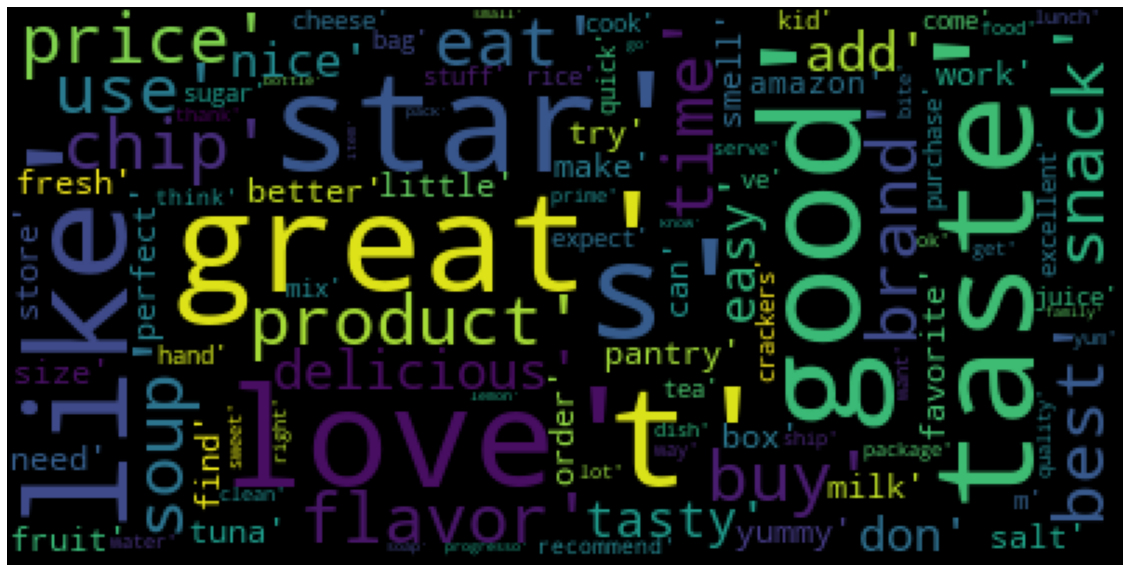

In [ ]:
# Top 100 most common word
################################
wc(str(m),'black','Common Words' )

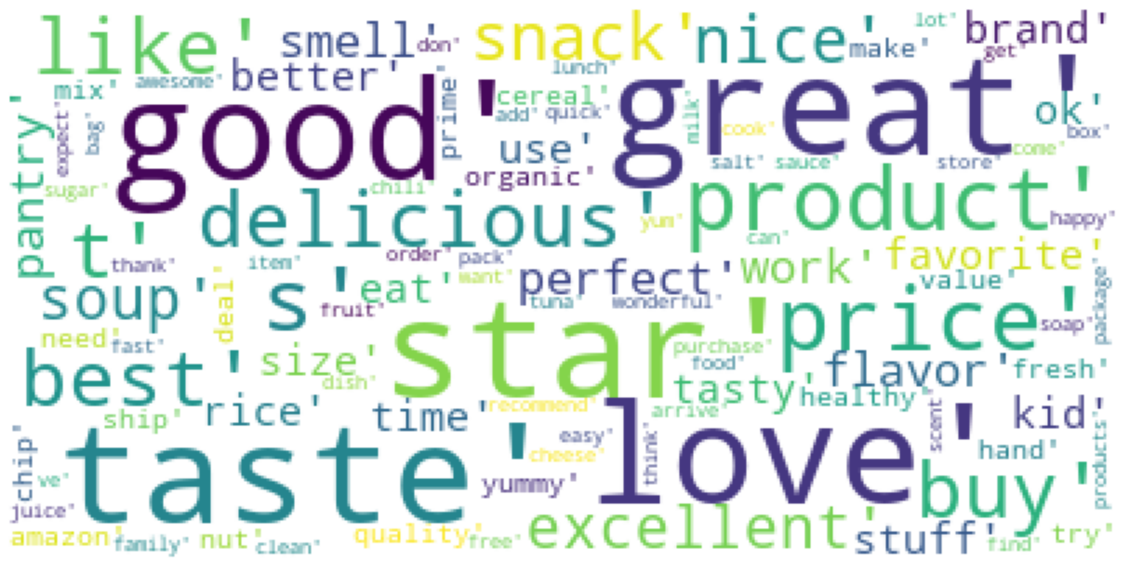

In [ ]:
# Top 100 most common Positive word
################################
wc(str(m_p),'white','Positive Words' )

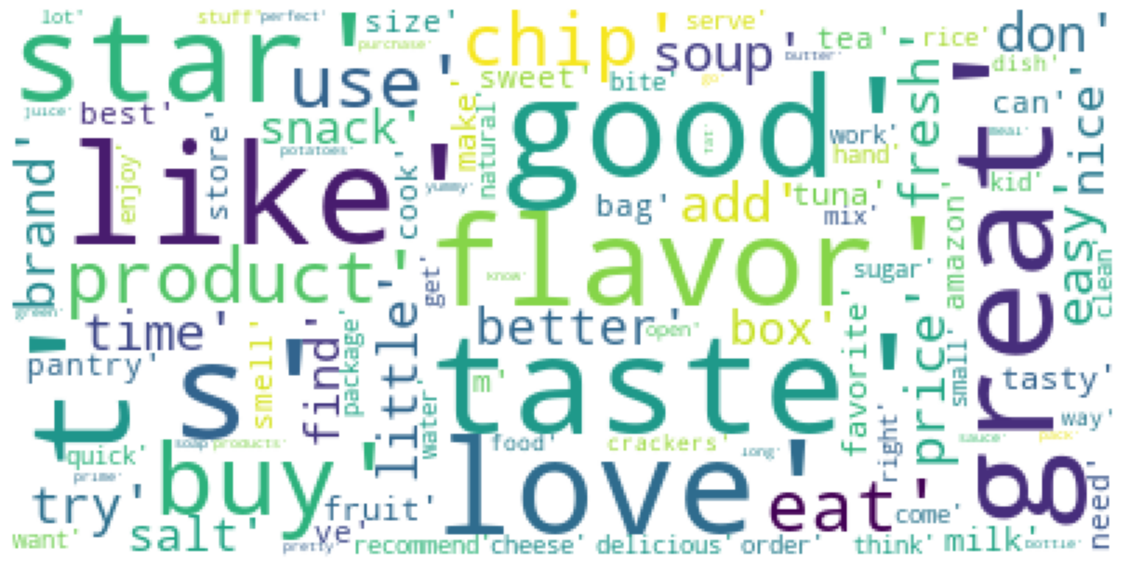

In [ ]:
# Top 100 most common Neutral word
################################
wc(str(m_nu),'white','Neutral Words' )

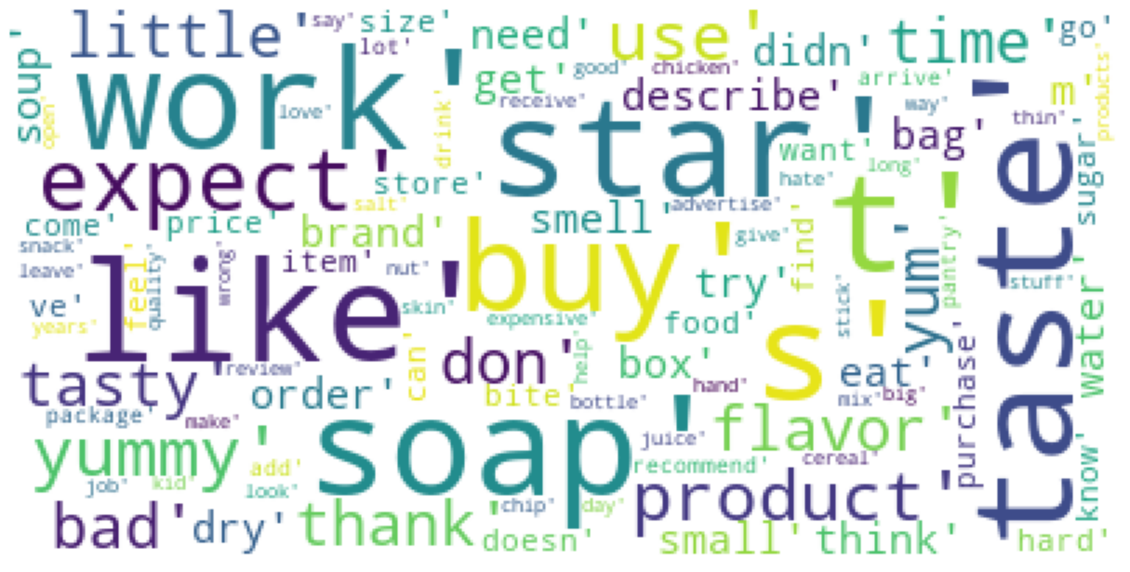

In [ ]:
# Top 100 most common Negative word
################################
wc(str(m_ng),'white','Neutral Words' )

In [ ]:
#Save clean dataset for futher analysis
pantry_bkp.to_csv('clean_data_finall.csv', index=False)

In [ ]:
pantry_bkp.isnull().sum()

rating            0
verified          0
Date              0
reviewerID        0
asin              0
reviewerName      0
unixReviewTime    0
description       0
title             0
also_buy          0
brand             0
feature           0
rank              0
also_view         0
price             0
review_text       0
clean_text        0
Polarity          0
Analysis          0
dtype: int64

In [ ]:
from google.colab import files
files.download('clean_data_finall.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>